# Logistic Regression - Assignment 3

1. Using the data set of two examination results design a predictor using logistic regression for predicting whether a student can get an admission in the institution. Use regularizer to further tune the parameters.  Use 70 % data for training and rest 30% data for testing your predictor and calculate the efficiency of the predictor/hypothesis.

    Hints: 	
    1. You can pre process  the data for convenience.
    2. You must use Python program for evaluating parameters using batch gradient descent algorithm (GDA). 
       No function should be used for GDA.

In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### Read the data

In [24]:
data = pd.read_csv('data set for two exam results.csv')
#data = data.sample(frac=1).reset_index(drop=True)
data.head()

,t1,t2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Normalize the data

In [25]:
x = np.array(data.iloc[:,[0,1]])
y = np.array(data.iloc[:,2]).reshape(-1,1)
mean = x.mean(axis=0)
std = x.std(axis=0)
x = (x- mean) / std
x = np.insert(x, 0, 1,axis = 1)
x[:5]

array([[ 1.        , -1.60224763,  0.63834112],
       [ 1.        , -1.82625564, -1.2075414 ],
       [ 1.        , -1.53903969,  0.3612943 ],
       [ 1.        , -0.28210129,  1.0863683 ],
       [ 1.        ,  0.69152826,  0.49337794]])

### Split the data to train & test (70 - 30 split)

In [26]:
d = int(y.shape[0] * 0.7)

xtrain = x[:d]
xtest = x[d:]
ytrain = y[:d]
ytest = y[d:]

### Cost function

In [27]:
def cost(x,y,w,lamb=0):
    h = 1/ (1 + np.exp(- np.matmul(x,w)))
    cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).sum() 
    return (cost + lamb * np.dot(w.T,w)[0,0]) / y.shape[0]

### Gradient descent 

In [28]:
def gradient_descent(x, y, alpha, iterations, lamb=0):
    m = y.shape[0]
    cost_list = []
    grad_list = []
    w = np.zeros((x.shape[1],1))
    for i in range(iterations):
        h = 1/ (1 + np.exp(- np.matmul(x,w))) 
        w1 = np.array(w,copy=True)
        w1[0,0]= 0
        grad = np.dot(x.T,(h - y)) + lamb * w1
        grad_list.append(grad)
        w = w - (alpha/m) * grad
        if (np.abs(grad) > 0.01).sum() == 0:
            break
        cost_list.append(cost(x,y,w,lamb))
    return cost_list, grad_list, w

### Calling GD with alpha = 0.01 and iterations = 100

In [29]:
cost_list, grad_list, w = gradient_descent(xtrain, ytrain, 0.01, 5000)

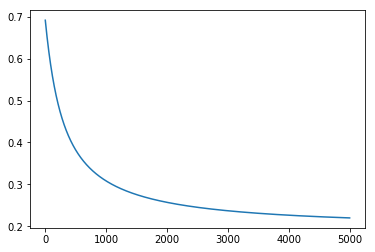

In [30]:
plt.plot(cost_list)

### Drawing decision boundary

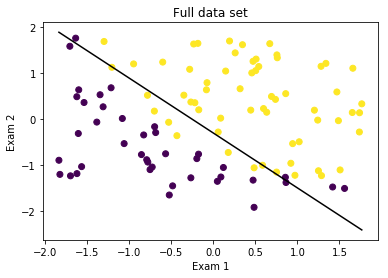

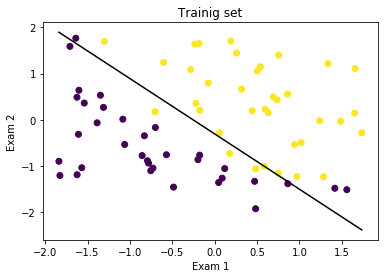

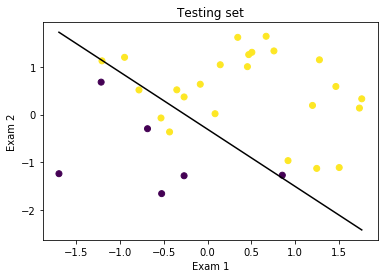

In [31]:
def plot(X,Y,w,title):
    #p = np.where(Y > 0)
    #n = np.where(Y == 0)
    plt.title(title)
    plt.xlabel('Exam 1')
    plt.ylabel('Exam 2')
    plt.scatter(X[:,1], X[:,2],c=Y.reshape(-1,))
    #plt.scatter(X[n,1], X[n,2])
    linex = [min(X[:,1]),max(X[:,1])]
    liney = [(-w[0,0] -w[1,0] * i)/w[2,0] for i in linex]
    plt.plot(linex, liney,'k')
    plt.show()
plot(x,y,w,'Full data set')
plot(xtrain,ytrain,w,'Trainig set')
plot(xtest,ytest,w,'Testing set')

In [32]:
def accuracy(x, y, w):
    h = np.dot(x, w) > 0
    e = np.abs(h - y).sum()
    return 1 - (e)/len(y)

In [33]:
accuracy(xtest,ytest,w)

0.8333333333333334

# Adding Polynomial Features

Added $X_1^2$ and $X_2^2$ terms

In [34]:
X = np.insert(x,3,x[:,1]**2,axis=1)
X = np.insert(X,4,x[:,2]**2,axis=1)
xtrain = X[:d]
xtest = X[d:]
X[:5]

array([[ 1.        , -1.60224763,  0.63834112,  2.56719747,  0.40747938],
       [ 1.        , -1.82625564, -1.2075414 ,  3.33520966,  1.45815624],
       [ 1.        , -1.53903969,  0.3612943 ,  2.36864317,  0.13053357],
       [ 1.        , -0.28210129,  1.0863683 ,  0.07958114,  1.18019608],
       [ 1.        ,  0.69152826,  0.49337794,  0.47821133,  0.24342179]])

In [35]:
cost_list, grad_list, w = gradient_descent(xtrain, ytrain, 0.15, 2000,0.05)

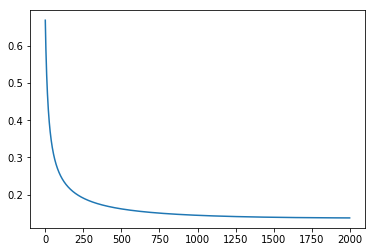

In [36]:
plt.plot(cost_list)

In [37]:
def predict(x,w):
    t = np.insert(x,0,1,axis=1) 
    T = np.insert(t,3,t[:,1]**2,axis=1)
    T = np.insert(T,4,t[:,2]**2,axis=1)
    Z = 1/ (1 + np.exp(- np.matmul(T,w))) 
    return  Z

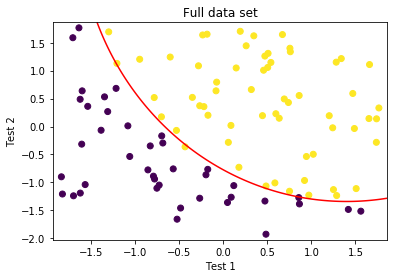

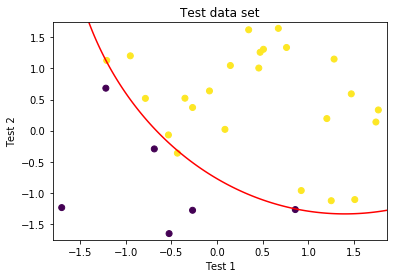

In [38]:
def plot(x,y,w,title):
    h = .005  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = x[:, 1].min() - .1, x[:, 1].max() + .1
    y_min, y_max = x[:, 2].min() - .1, x[:, 2].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    Z = predict(np.c_[xx.ravel(), yy.ravel()],w)

    Z = Z.reshape(xx.shape)
    plt.title(title)
    plt.xlabel('Test 1')
    plt.ylabel('Test 2')
    plt.scatter(x[:,1], x[:,2],c=y.reshape(-1,))
    CS = plt.contour(xx, yy, Z,levels=[0.5],colors=('r',))
    #plt.clabel(CS, colors = 'r', fontsize=10)
    plt.show()
plot(x,y,w,'Full data set')
plot(xtest,ytest,w,'Test data set')

In [39]:
accuracy(xtest,ytest,w)

0.9666666666666667

In [40]:
accuracy(X,y,w)

0.99

## Expirements

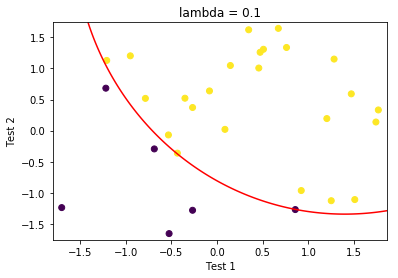

Accuracy: 1.0


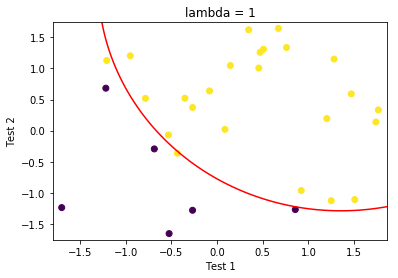

Accuracy: 0.9333333333333333


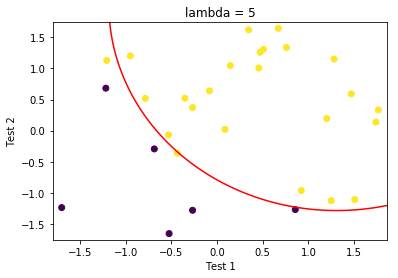

Accuracy: 0.9333333333333333


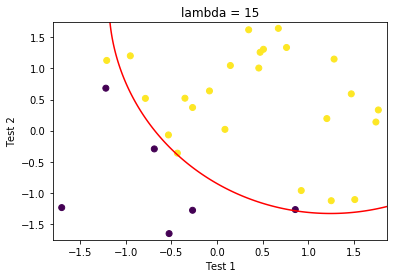

Accuracy: 0.9333333333333333


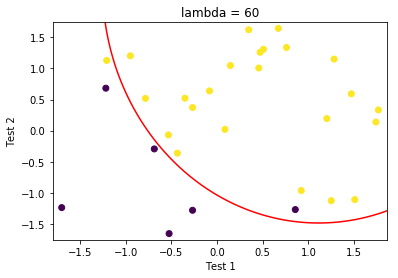

Accuracy: 0.9333333333333333


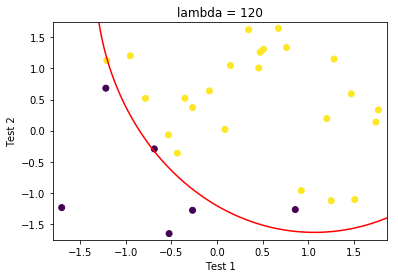

Accuracy: 0.9


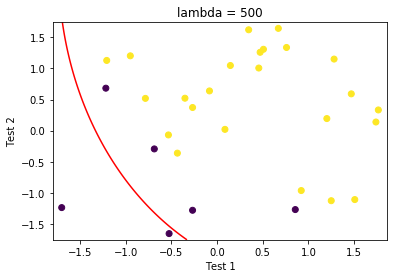

Accuracy: 0.8666666666666667


In [44]:
for i in [0.1,1,5,15,60,120,500]:
    cost_list, grad_list, w = gradient_descent(xtrain, ytrain, 0.15, 8000,i)
    a = accuracy(xtest,ytest,w)
    plot(xtest,ytest,w,'lambda = '+ str(i))
    print("Accuracy: "+ str(a))
